In [1]:
from omegaconf import OmegaConf
from hydra.utils import instantiate
import sys
import os
from matplotlib import pyplot as plt
import numpy as np
import hydra
os.chdir('/home/jingyan/Documents/sign_language_rgb')
sys.path.append('src')

hydra.initialize_config_dir('/home/jingyan/Documents/sign_language_rgb/configs')
cfg = hydra.compose('run/train/vitpose_vitpool_tconv_trans_ddp.yaml')
    

/tmp/ipykernel_2725647/2419904410.py:11: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  hydra.initialize_config_dir('/home/jingyan/Documents/sign_language_rgb/configs')
/home/jingyan/anaconda3/envs/dl/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'run/train/vitpose_vitpool_tconv_trans_ddp.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


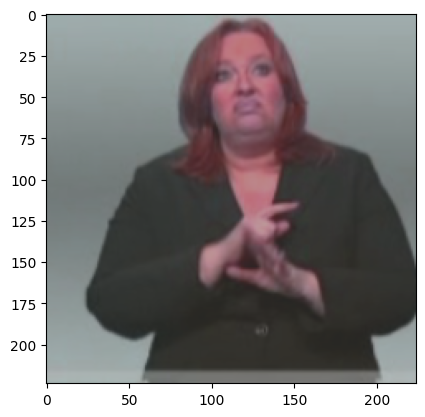

In [20]:
dataset = instantiate(cfg.data.dataset.train)
dataset[0]['video'].dtype

frame = dataset[2]['video'].numpy()
frame  = frame.transpose(0, 2, 3, 1)
plt.imshow(frame[30])

In [44]:
from PIL import Image
frame0 = (frame[20] * 255).astype('uint8')
frame1 = (frame[21] * 255).astype('uint8')
Image.fromarray(frame0).save('resources/0.jpg')
Image.fromarray(frame1).save('resources/1.jpg')

tensor(0.0005)


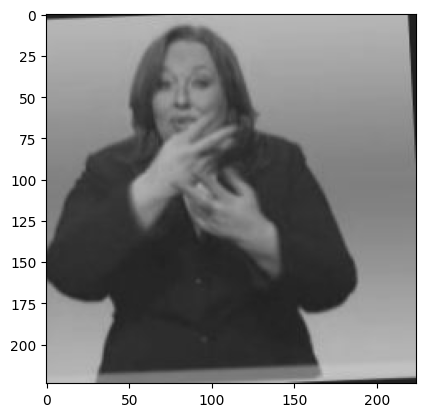

In [23]:
import torchvision.transforms as t
import PIL.Image as Image
import torch

img = Image.open('resources/0.jpg')
img = t.ToTensor()(img)
img = img/255.
img = t.ColorJitter(0.4, 0.4, 0.4, 0.1)(img)
print(img.min())
img = img.numpy().transpose(1, 2, 0) * 255
plt.imshow(img)